In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.optimizers import  SGD
from keras.regularizers import l2
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
import string
import os

Loading and Checking the dataset

In [6]:
df_train = pd.read_csv("D:\\PhD\\UNSW_NB15_training-set.csv")

print(len(df_train))


82332


In [7]:
df = pd.read_csv("D:\\PhD\\UNSW_NB15_training-set.csv")
# information about the dataset
df.info()
# Save the concatenated DataFrame to a new CSV file
#df.to_csv('D:\\PhD\\concatenated_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [8]:
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


In [9]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Checking for duplicates

In [10]:
print(df.duplicated().sum())

0


Checking for missing values

In [11]:
print(df.isna().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

No Missing Values in the dataset

Feature engineering

Dropping unnecessary features
The first column we will drop is id. This is just for identification, so we can remove this column.

This is a binary classification problem, so we only use column label to classify attack (1) or normal (0). Then, we do not need attack details in attack_cat

In [12]:
df = df.drop(columns=[ 'id','attack_cat'])
df.to_csv("D:\\PhD\\UNSW_NB15_training-set.csv", index = False)


In [14]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


In [15]:
cols  = ['proto','state','service']
cols

['proto', 'state', 'service']

In [16]:
def normalize(df, columns):
    """
    @param df pandas DataFrame
    @param cols a list of columns to normalize
    @return a DataFrame with normalized specified features
    """
    result = df.copy()  # Create a copy of the DataFrame
    
    for feature_name in columns:
        # Check if the column contains numerical data, and convert if necessary
        if pd.api.types.is_numeric_dtype(result[feature_name]):
            max_value = result[feature_name].max()
            min_value = result[feature_name].min()
            
            # Check if max and min values are different (to avoid division by zero)
            if max_value != min_value:
                result[feature_name] = (result[feature_name] - min_value) / (max_value - min_value)
        else:
            print(f"Warning: Skipping normalization for non-numeric column '{feature_name}'")
    
    # Move this line outside of the loop to save the result once after all normalization is completed
    result.to_csv("D:\\PhD\\UNSW_NB15_training-set.csv", index=True)
    
    return result

# Assuming df and cols are defined before calling this function
result_df = normalize(df, cols)
print(result_df)
    
  


            dur proto service state  spkts  dpkts  sbytes  dbytes  \
0      0.000011   udp       -   INT      2      0     496       0   
1      0.000008   udp       -   INT      2      0    1762       0   
2      0.000005   udp       -   INT      2      0    1068       0   
3      0.000006   udp       -   INT      2      0     900       0   
4      0.000010   udp       -   INT      2      0    2126       0   
...         ...   ...     ...   ...    ...    ...     ...     ...   
82327  0.000005   udp       -   INT      2      0     104       0   
82328  1.106101   tcp       -   FIN     20      8   18062     354   
82329  0.000000   arp       -   INT      1      0      46       0   
82330  0.000000   arp       -   INT      1      0      46       0   
82331  0.000009   udp       -   INT      2      0     104       0   

                rate  sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0       90909.090200   254  ...                 1                 1   
1      125000.000300   254  .

In [17]:
cols  = ['proto','state','service']
cols

['proto', 'state', 'service']

In [18]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    
    # Move this line outside of the loop to save the result once after all columns are one-hot encoded
    df.to_csv("D:\\PhD\\UNSW_NB15_training-set.csv", index=True)
    
    return df

# Assuming df and cols are defined before calling this function
result_df = one_hot(df, cols)
print(result_df)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19936\197478853.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(each, 1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19936\197478853.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(each, 1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19936\197478853.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(each, 1)


            dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0      0.000011      2      0     496       0   90909.090200   254     0   
1      0.000008      2      0    1762       0  125000.000300   254     0   
2      0.000005      2      0    1068       0  200000.005100   254     0   
3      0.000006      2      0     900       0  166666.660800   254     0   
4      0.000010      2      0    2126       0  100000.002500   254     0   
...         ...    ...    ...     ...     ...            ...   ...   ...   
82327  0.000005      2      0     104       0  200000.005100   254     0   
82328  1.106101     20      8   18062     354      24.410067   254   252   
82329  0.000000      1      0      46       0       0.000000     0     0   
82330  0.000000      1      0      46       0       0.000000     0     0   
82331  0.000009      2      0     104       0  111111.107200   254     0   

              sload        dload  ...  service_ftp  service_ftp-data  \
0      1.803636

Adding Missing Values (RMV Algorithm)

In [19]:
import pandas as pd
import numpy as np
import random
import os
import time

def add_missing_values(csv_file, num_columns, num_cells, exclude_columns):
    # Load the csv file into a pandas DataFrame
    start_time = time.time()
    df = pd.read_csv("D:\\PhD\\UNSW_NB15_training-set.csv")
    load_time = time.time() - start_time

    # Count the initial number of missing values
    initial_missing_values = df.isnull().sum()
    print(f"Initial number of missing values:\n{initial_missing_values}")

    # Get the list of all columns
    all_columns = df.columns.tolist()

    # Remove the excluded columns from the list of all columns
    for col in exclude_columns:
        if col in all_columns:
            all_columns.remove(col)

    # Check if the number of columns to be altered exceeds the total columns
    if num_columns > len(all_columns):
        print("The number of columns to be altered is more than the total number of columns in the file.")
        return

    # Calculate the number of missing values to be added in each column
    cells_per_column = num_cells // num_columns
    extra_cells = num_cells % num_columns

    # Randomly select 'num_columns' columns
    selected_columns = random.sample(all_columns, num_columns)

    # Initialize a DataFrame to keep track of which rows were modified
    modified_rows = pd.DataFrame(index=df.index)

    # Iterate over each selected column
    step_times = []
    for i, col in enumerate(selected_columns):
        # Distribute the extra cells among the first few columns
        extra = 1 if i < extra_cells else 0

        # Randomly select 'cells_per_column + extra' row indices
        start_time = time.time()
        row_indices = random.sample(range(len(df[col])), cells_per_column + extra)
        random_sampling_time = time.time() - start_time

        # Record the modified rows for this column
        modified_rows[col] = False
        modified_rows.loc[row_indices, col] = True

        step_times.append({
            'Column': col,
            'Random Sampling Time': random_sampling_time
        })

    
        
    for col in selected_columns:
    # Randomly select row indices for missing values
        missing_indices = np.random.choice(df.index, cells_per_column + extra, replace=False)
    
    # Set 'NaN' values in the selected column at the chosen indices
        df.loc[missing_indices, col] = np.nan

    # Count the final number of missing values
    final_missing_values = df.isnull().sum()
    print(f"Final number of missing values:\n{final_missing_values}")

    # Save the DataFrame to a new csv file
    start_time = time.time()
    base_dir, file_name = os.path.split(csv_file)
    name, extension = os.path.splitext(file_name)
    new_file = os.path.join(base_dir, 'new2_' + name + extension)
    df.to_csv(new_file, index=False)
    saving_time = time.time() - start_time

    print(f"Modified CSV saved as '{new_file}'")
    print("Execution times:")
    print(f"- Loading CSV: {load_time:.4f} seconds")
    for step_time in step_times:
        print(f"- Column: {step_time['Column']}")
        print(f"  - Random Sampling Time: {step_time['Random Sampling Time']:.4f} seconds")
    print(f"- Saving CSV: {saving_time:.4f} seconds")

# Use the function
dataset_file = "D:\\PhD\\UNSW_NB15_training-set.csv"
exclude_columns = ['label']  # replace with columns to exclude
add_missing_values(dataset_file, 3, 100, exclude_columns)


Initial number of missing values:
Unnamed: 0        0
dur               0
spkts             0
dpkts             0
sbytes            0
                 ..
service_radius    0
service_smtp      0
service_snmp      0
service_ssh       0
service_ssl       0
Length: 192, dtype: int64
Final number of missing values:
Unnamed: 0         0
dur                0
spkts             33
dpkts              0
sbytes             0
                  ..
service_radius     0
service_smtp       0
service_snmp       0
service_ssh        0
service_ssl        0
Length: 192, dtype: int64
Modified CSV saved as 'D:\PhD\new2_UNSW_NB15_training-set.csv'
Execution times:
- Loading CSV: 0.7547 seconds
- Column: spkts
  - Random Sampling Time: 0.0294 seconds
- Column: proto_uti
  - Random Sampling Time: 0.0010 seconds
- Column: ct_dst_sport_ltm
  - Random Sampling Time: 0.0000 seconds
- Saving CSV: 2.8925 seconds


In [20]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv("D:\\PhD\\new2_UNSW_NB15_training-set.csv")

# Iterate through the columns and check for 'NaN' values
columns_with_nan = []

for column in df.columns:
    if df[column].isnull().any():
        columns_with_nan.append(column)

# Print the columns with 'NaN' values
print("Columns with 'NaN' values:")
print(columns_with_nan)



Columns with 'NaN' values:
['spkts', 'ct_dst_sport_ltm', 'proto_uti']


In [21]:
import pandas as pd

# Check if there are missing values in a specific column
df = pd.read_csv("D:\\PhD\\new2_UNSW_NB15_training-set.csv")
missing_values = df['spkts'].isna().sum()
print(f"Number of missing values in 'sbytes': {missing_values}")


Number of missing values in 'sbytes': 33


In [22]:
pd.read_csv("D:\\PhD\\new2_UNSW_NB15_training-set.csv")


,Unnamed: 0,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0,0.000011,2.0,0,496,0,90909.090200,254,0,1.803636e+08,...,0,0,0,0,0,0,0,0,0,0
1,1,0.000008,2.0,0,1762,0,125000.000300,254,0,8.810000e+08,...,0,0,0,0,0,0,0,0,0,0
2,2,0.000005,2.0,0,1068,0,200000.005100,254,0,8.544000e+08,...,0,0,0,0,0,0,0,0,0,0
3,3,0.000006,2.0,0,900,0,166666.660800,254,0,6.000000e+08,...,0,0,0,0,0,0,0,0,0,0
4,4,0.000010,2.0,0,2126,0,100000.002500,254,0,8.504000e+08,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82327,0.000005,2.0,0,104,0,200000.005100,254,0,8.320000e+07,...,0,0,0,0,0,0,0,0,0,0
82328,82328,1.106101,20.0,8,18062,354,24.410067,254,252,1.241044e+05,...,0,0,0,0,0,0,0,0,0,0
82329,82329,0.000000,1.0,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
82330,82330,0.000000,1.0,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dfm = pd.read_csv("D:\\PhD\\new2_UNSW_NB15_training-set.csv")
print(dfm.isna().sum())

Unnamed: 0         0
dur                0
spkts             33
dpkts              0
sbytes             0
                  ..
service_radius     0
service_smtp       0
service_snmp       0
service_ssh        0
service_ssl        0
Length: 192, dtype: int64


In [25]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
  Using cached matplotlib-3.8.0-cp39-cp39-win_amd64.whl (7.6 MB)



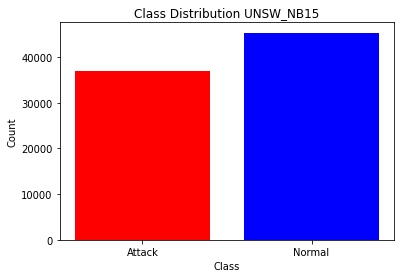

Missing Values Info:
{'spkts': 33, 'ct_dst_sport_ltm': 33, 'proto_uti': 33}


In [24]:
# Data Exploration
import matplotlib.patches as mpatches
def visualize_class_distribution(csv_file, Class,datasetName):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv("D:\\PhD\\new2_UNSW_NB15_training-set.csv")
    # Check the class distribution
    class_counts = df[Class].value_counts()

    # Define class labels and corresponding colors
    class_labels = ['Attack', 'Normal']
    class_colors = ['blue', 'red']

    # Plot the class distribution
    plt.bar(class_counts.index, class_counts.values, color=class_colors)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution '+datasetName)
    plt.xticks(range(len(class_counts)), class_labels)

    # Create a legend
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(class_colors, class_labels)]
    plt.show()

def detect_missing_values(df):
    """
    Detect any missing values in the dataframe and return the features with missing values and their counts.

    Args:
        df (pd.DataFrame): Input pandas DataFrame

    Returns:
        dict: Dictionary where keys are feature names and values are the count of missing values
    """
    missing_values = df.isnull().sum()  # Get the count of missing values in each column
    missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values
    
    return dict(missing_values)
dataset_file = "D:\\PhD\\new2_UNSW_NB15_training-set.csv"
dataset_name = "UNSW_NB15"
class_column = "label"  # Replace with the actual class column name in your dataset
visualize_class_distribution(dataset_file, class_column, dataset_name)

# Detect missing values
df = pd.read_csv(dataset_file)
missing_values_info = detect_missing_values(df)
print("Missing Values Info:")
print(missing_values_info)
   


In [25]:
df['label'].value_counts(normalize=True)

1    0.5506
0    0.4494
Name: label, dtype: float64

In [26]:
a = pd.read_csv("D:\\PhD\\new2_UNSW_NB15_training-set.csv")
a

,Unnamed: 0,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0,0.000011,2.0,0,496,0,90909.090200,254,0,1.803636e+08,...,0,0,0,0,0,0,0,0,0,0
1,1,0.000008,2.0,0,1762,0,125000.000300,254,0,8.810000e+08,...,0,0,0,0,0,0,0,0,0,0
2,2,0.000005,2.0,0,1068,0,200000.005100,254,0,8.544000e+08,...,0,0,0,0,0,0,0,0,0,0
3,3,0.000006,2.0,0,900,0,166666.660800,254,0,6.000000e+08,...,0,0,0,0,0,0,0,0,0,0
4,4,0.000010,2.0,0,2126,0,100000.002500,254,0,8.504000e+08,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82327,0.000005,2.0,0,104,0,200000.005100,254,0,8.320000e+07,...,0,0,0,0,0,0,0,0,0,0
82328,82328,1.106101,20.0,8,18062,354,24.410067,254,252,1.241044e+05,...,0,0,0,0,0,0,0,0,0,0
82329,82329,0.000000,1.0,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
82330,82330,0.000000,1.0,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0


Training with SDA and fine tuning with gradeint boosting 

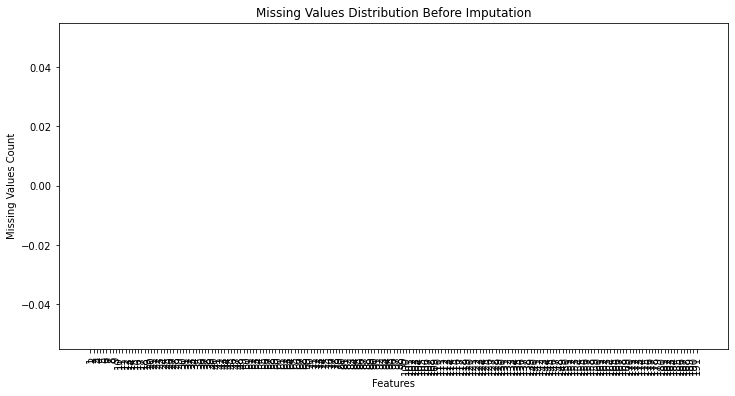

Epoch 1/100
322/322 [==============================] - 5s 9ms/step - loss: 1.0273
Epoch 2/100
322/322 [==============================] - 3s 11ms/step - loss: 1.0000
Epoch 3/100
322/322 [==============================] - 3s 10ms/step - loss: 1.0000
Epoch 4/100
322/322 [==============================] - 3s 8ms/step - loss: 1.0000
Epoch 5/100
322/322 [==============================] - 4s 12ms/step - loss: 1.0000
Epoch 6/100
322/322 [==============================] - 4s 11ms/step - loss: 0.9807
Epoch 7/100
322/322 [==============================] - 4s 12ms/step - loss: 0.9546
Epoch 8/100
322/322 [==============================] - 3s 9ms/step - loss: 0.9466
Epoch 9/100
322/322 [==============================] - 3s 9ms/step - loss: 0.9430
Epoch 10/100
322/322 [==============================] - 4s 11ms/step - loss: 0.9391
Epoch 11/100
322/322 [==============================] - 4s 12ms/step - loss: 0.9346
Epoch 12/100
322/322 [==============================] - 4s 12ms/step - loss: 0.9310
Epoch

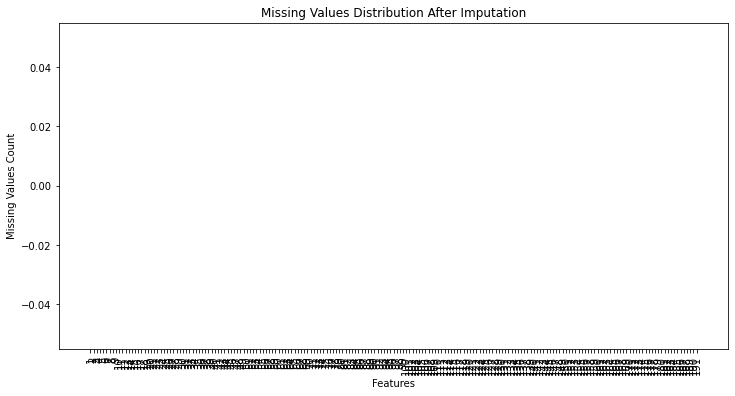

Imputed data saved to 'D:\PhD\imp.csv'
Performance metrics after fixing missing values: 
Logistic Regression Accuracy: 0.9545012874702424
Logistic Regression Precision: 0.9544932311782922
Logistic Regression Recall: 0.9545012874702424
Logistic Regression F1 Score: 0.9544821305198583
Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F1 Score: 1.0
Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0
SVM Accuracy: 0.96667152504494
SVM Precision: 0.9669251050445096
SVM Recall: 0.96667152504494
SVM F1 Score: 0.966619202236312
KNN Accuracy: 0.9859714327357528
KNN Precision: 0.9859823326288919
KNN Recall: 0.9859714327357528
KNN F1 Score: 0.9859738804500794


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual file path)

def load_data(file_path):
    df = pd.read_csv("D:\\PhD\\UNSW_NB15_training-set.csv")
    return df

def preprocess_data(df, targetName):
    features, target = df.drop(targetName, axis=1), df[targetName]
    continuous_features = features.select_dtypes(include=[np.number])
    categorical_features = features.select_dtypes(exclude=[np.number])

    scaler = StandardScaler()
    continuous_features = pd.DataFrame(scaler.fit_transform(continuous_features), columns=continuous_features.columns)

    encoder = OneHotEncoder()
    categorical_features = encoder.fit_transform(categorical_features).toarray()

    features = np.concatenate([continuous_features, categorical_features], axis=1)

    return features, target

def build_stacked_denoising_autoencoder(input_dim, encoding_dims=[32, 16]):
    input_layer = Input(shape=(input_dim,))
    output_layer = input_layer

    for encoding_dim in encoding_dims:
        # Add GaussianNoise layer to introduce noise at each layer's input
        noisy_input = GaussianNoise(0.1)(output_layer)  # Adjust noise level as needed

        # Encoder
        encoded = Dense(encoding_dim, activation='relu')(noisy_input)

        # Decoder
        decoded = Dense(input_dim, activation='sigmoid')(encoded)

        # Define autoencoder for this layer
        autoencoder_layer = Model(input_layer, decoded)
        autoencoder_layer.compile(optimizer=Adam(), loss='mean_squared_error')

        # Set the output of this layer as the input for the next layer
        output_layer = autoencoder_layer(noisy_input)

    # Stacked denoising autoencoder
    stacked_denoising_autoencoder = Model(input_layer, output_layer)
    stacked_denoising_autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

    return stacked_denoising_autoencoder

def train_stacked_denoising_autoencoder(stacked_autoencoder, features, epochs=50):
    history = stacked_autoencoder.fit(features, features, epochs=epochs, batch_size=256, shuffle=True)
    return stacked_autoencoder, history

def fine_tune_with_gradient_boosting(features, missing_mask):
    adjusted_features = features.copy()
    feature_importance = np.zeros(features.shape[1])
    for i in range(features.shape[1]):
        model = GradientBoostingRegressor()
        valid_mask = ~missing_mask[:, i]
        model.fit(features[valid_mask, i].reshape(-1, 1), missing_mask[valid_mask, i])
        missing_proba = model.predict(features[~valid_mask, i].reshape(-1, 1))
        if np.sum(missing_mask[:, i]) > 0:
            adjusted_features[~valid_mask, i] *= missing_proba
        feature_importance[i] = model.feature_importances_
    return adjusted_features, feature_importance

def impute_with_stacked_autoencoder(stacked_autoencoder, features):
    # Identify the missing values in the features NumPy array
    missing_rows_mask = np.isnan(features).any(axis=1)
    missing_rows = features[missing_rows_mask]

    if missing_rows.shape[0] != 0:
        return features  # No missing values to impute

    imputed_features = features.copy()

    for i, row in enumerate(missing_rows):
        missing_row_mask = missing_rows_mask[i]
        if missing_row_mask:
            imputed_row = stacked_autoencoder.predict(row.reshape(1, -1))
            imputed_features[i] = imputed_row

    return imputed_features


def train_and_evaluate_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier()
    }

    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
        print(f'{name} Precision: {precision_score(y_test, y_pred, average="weighted")}')
        print(f'{name} Recall: {recall_score(y_test, y_pred, average="weighted")}')
        print(f'{name} F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
        
#def visualize_missing_values(features, title):
#    missing_values = np.isnan(features).sum(axis=0)
#    plt.figure(figsize=(12, 6))
#    plt.bar(range(len(missing_values)), missing_values)
#    plt.xlabel('Features')
#    plt.ylabel('Missing Values Count')
#    plt.title(f'Missing Values Distribution {title}')
#    plt.xticks(range(len(missing_values)), range(1, len(missing_values) + 1), rotation=90)
#    plt.show()

def main(training_file_path, testing_file_path, targetName, output_file):
    # Load the training dataset (no missing values) and the testing dataset (with missing values)
    train_df = load_data("D:\\PhD\\UNSW_NB15_training-set.csv")
    test_df = load_data("D:\\PhD\\new2_UNSW_NB15_training-set.csv")

    # Preprocess and separate features and target for training
    train_features, train_target = preprocess_data(train_df, targetName)

    # Preprocess the testing dataset (with missing values)
    test_features, test_target = preprocess_data(test_df, targetName)  # Extract the target variable

    # Visualize the distribution of missing values before imputation
   # visualize_missing_values(train_features, "Before Imputation")

    # Build and train the SDA on the training dataset
    stacked_autoencoder = build_stacked_denoising_autoencoder(train_features.shape[1])
    stacked_autoencoder, _ = train_stacked_denoising_autoencoder(stacked_autoencoder, train_features, epochs=100)

    # Identify the missing values in the features NumPy array
    missing_rows_mask = np.isnan(test_features).any(axis=1)
    missing_rows = test_features[missing_rows_mask]

    if missing_rows.shape[0] > 0:
        # Impute missing values in the testing dataset using the trained SDA
        imputed_values = stacked_autoencoder.predict(missing_rows)
        test_features[missing_rows_mask] = imputed_values

        # Replace the corresponding rows in the original testing DataFrame with the imputed values
        test_df.loc[missing_rows_mask, test_df.columns.drop(targetName)] = imputed_values

    # Convert features back to a DataFrame
    features_df = pd.DataFrame(test_features, columns=test_df.columns.drop(targetName))

    # Visualize the distribution of missing values after imputation
 #   visualize_missing_values(features_df, "After Imputation")

    # Save the imputed data to the specified output file
    imputed_df = pd.concat([features_df, test_df[targetName]], axis=1)
    imputed_df.to_csv(output_file, index=False)
    print(f"Imputed data saved to '{output_file}'")

    # Now you can proceed with training and evaluating classifiers if needed
    X_train, X_test, y_train, y_test = train_features, test_features, train_target, test_target

    print("Performance metrics after fixing missing values: ")
    train_and_evaluate_classifiers(X_train, X_test, y_train, y_test)

    
# Specify file paths for the training and testing datasets
training_dataset_file = "D:\\PhD\\UNSW_NB15_training-set.csv"
testing_dataset_file = "D:\\PhD\\new2_UNSW_NB15_training-set.csv"
output_file = "D:\\PhD\\imp.csv"  # Specify the path to save the imputed data

# Run the main function
main(training_dataset_file, testing_dataset_file, 'label', output_file)




In [41]:
import pandas as pd
import numpy as np



# Assuming you have 'X' (features) and 'y' (labels) defined as follows:
X = df.drop(columns=['label'])  # Assuming 'label' is the target variable
y = df['label']

# Calculate the correlation matrix between features and the target variable
correlation_with_target = X.corrwith(y)

# Set a threshold for correlation values (e.g., 0.1 for positive or negative correlation)
correlation_threshold = 0.3

# Select features with correlation values above the threshold
selected_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index.tolist()

# Create a new DataFrame with only the selected features
selected_df = X[selected_features]

# Save the selected features DataFrame to a CSV file
selected_df.to_csv('D:\\PhD\\selected_features.csv', index=False)

# Print the selected feature names
print("Selected features based on correlation with the target:")
print(selected_features)






Selected features based on correlation with the target:
['Unnamed: 0', 'rate', 'sttl', 'swin', 'dwin', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'proto_tcp', 'state_CON', 'state_FIN', 'state_INT', 'service_-', 'service_dns']


In [54]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv("D:\\PhD\\UNSW_NB15_training-set.csv")

# Iterate through the columns and check for 'NaN' values
columns_with_nan = []

for column in df.columns:
    if df[column].isnull().any():
        columns_with_nan.append(column)

# Print the columns with 'NaN' values
print("Columns with 'NaN' values:")
print(columns_with_nan)

Columns with 'NaN' values:
[]
